# train a toy MNIST model


In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
#%%
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [10]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
print type(X_train)

<type 'numpy.ndarray'>


only train the model using few data (10?)

In [7]:
X_train_less = X_train[:10]
y_train_less = y_train[:10]

In [8]:
# reshape to be [samples][pixels][width][height]
X_train_less = X_train_less.reshape(X_train_less.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [10]:
# normalize inputs from 0-255 to 0-1
X_train_less = X_train_less / 255
X_test = X_test / 255

In [11]:
# one hot encode outputs
y_train_less = np_utils.to_categorical(y_train_less)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
#%%
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [13]:
#%%
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train_less, y_train_less, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

#%% Save the model
model.save('mnist_baseline_less.h5')

Train on 10 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 2.4037 - acc: 0.2000 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 2/10
 - 14s - loss: 1.6863 - acc: 0.6000 - val_loss: 2.3017 - val_acc: 0.1135
Epoch 3/10
 - 14s - loss: 0.8485 - acc: 1.0000 - val_loss: 2.3062 - val_acc: 0.0982
Epoch 4/10
 - 14s - loss: 0.2947 - acc: 1.0000 - val_loss: 2.3183 - val_acc: 0.1135
Epoch 5/10
 - 14s - loss: 0.0331 - acc: 1.0000 - val_loss: 2.3239 - val_acc: 0.1135
Epoch 6/10
 - 14s - loss: 0.0271 - acc: 1.0000 - val_loss: 2.3302 - val_acc: 0.1135
Epoch 7/10
 - 14s - loss: 0.0081 - acc: 1.0000 - val_loss: 2.3330 - val_acc: 0.1135
Epoch 8/10
 - 14s - loss: 0.0060 - acc: 1.0000 - val_loss: 2.3349 - val_acc: 0.1135
Epoch 9/10
 - 14s - loss: 0.0033 - acc: 1.0000 - val_loss: 2.3354 - val_acc: 0.1135
Epoch 10/10
 - 14s - loss: 0.0024 - acc: 1.0000 - val_loss: 2.3360 - val_acc: 0.1135
CNN Error: 88.65%


# The rough model is built, lets pick it up

In [11]:
#%%
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import load_model

from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
model_less = load_model('./mnist_baseline_less.h5')

In [11]:
def show_img(img_to_show):
    # Plot ad hoc mnist instances
    import matplotlib.pyplot as plt
    # plot 4 images as gray scale
    this_pic = plt.figure()
    plt.imshow(img_to_show, cmap=plt.get_cmap('gray'))
    plt.show()
    return this_pic
    
def process_img(img, label):
    '''
    conver the shape/format of the img
    '''
    # flatten 28*28 images to a 784 vector for each image
    # deal with a single img
    img = img.reshape(img.shape[0], 1, 28, 28).astype('float32')
    
    # normalization
    img = img / 255
    
    # flat the label
    label = np_utils.to_categorical(label, num_classes=10)
    
    return img, label

In [12]:
start = 213
end = 223
img_to_add = X_train[start:end]
label_to_add = y_train[start:end]

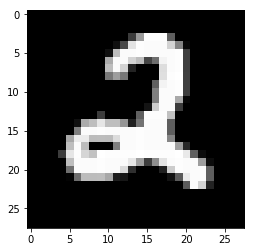

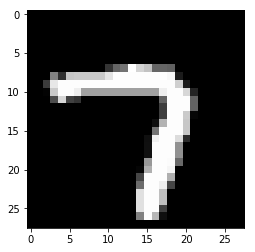

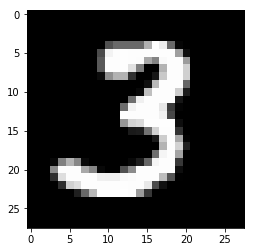

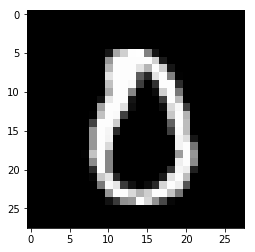

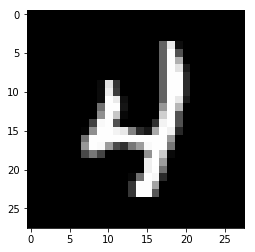

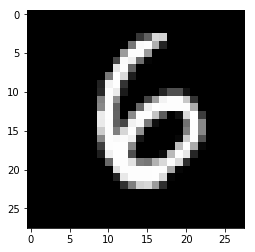

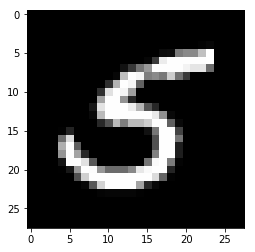

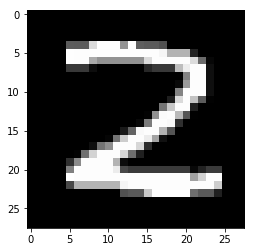

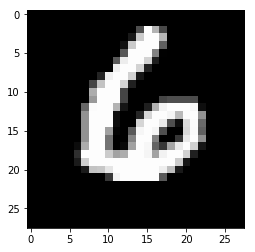

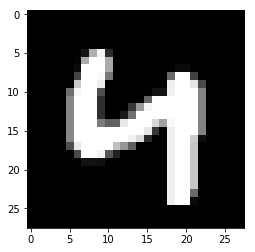

In [13]:
# save some pictures
from PIL import Image

for i in range(img_to_add.shape[0]):
    this_img = img_to_add[i, :, :]
    this_label = label_to_add[i]
    this_digit = show_img(this_img)
    im = Image.fromarray(this_img).convert('L')
    im.save('./_MNIST_/digits_num_' + str(i) + "_label_"+ str(this_label) + '.png')

In [14]:
# load back:
import glob
filelist = glob.glob('_MNIST_/*.png')

In [15]:
import numpy as np
x = np.array([np.array(Image.open(fname)) for fname in filelist])

In [16]:
x.shape

(10, 28, 28)

In [52]:
start = 222
end = 223
img_to_add = X_train[start:end]
label_to_add = y_train[start:end]
# show_img(img_to_add)

img, label = process_img(img_to_add, label_to_add)

In [53]:
# transfer the testing data
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
y_test = np_utils.to_categorical(y_test)

In [54]:
model_less.fit(img, label, validation_data=(X_test, y_test), epochs=1, batch_size=1, verbose=2)

Train on 1 samples, validate on 10000 samples
Epoch 1/1
 - 14s - loss: 0.0539 - acc: 1.0000 - val_loss: 9.6518 - val_acc: 0.3990
